In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [16]:
df = pd.read_csv("world-happiness-report.csv")

In [17]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [18]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [20]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

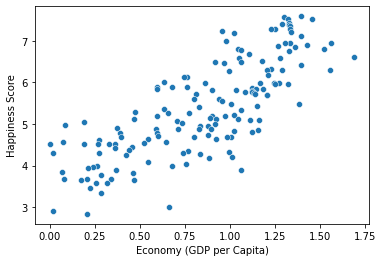

In [21]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

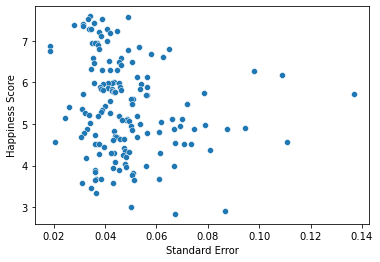

In [22]:
sns.scatterplot(x='Standard Error',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

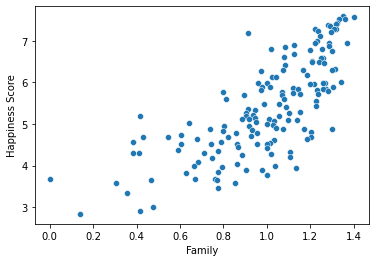

In [23]:
sns.scatterplot(x='Family',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

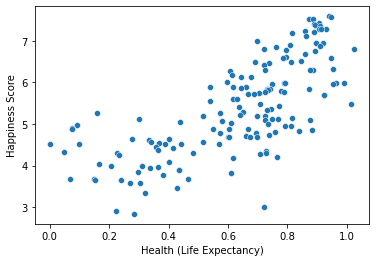

In [24]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

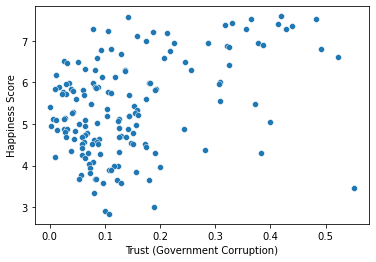

In [25]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

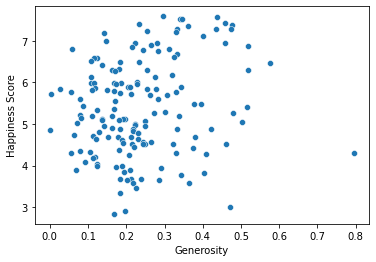

In [26]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

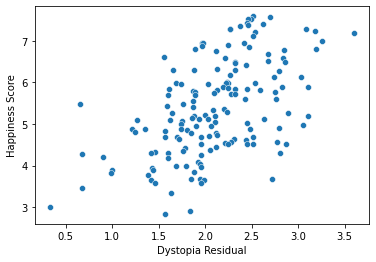

In [27]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Happiness Score'>

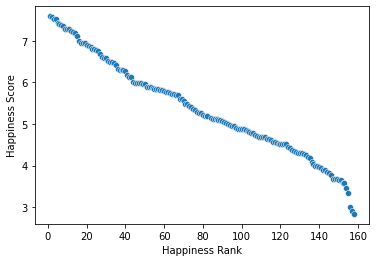

In [28]:
sns.scatterplot(x='Happiness Rank',y='Happiness Score',data=df)

In [29]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [30]:
df=df.drop(columns=['Country','Region','Happiness Rank'],axis=1)

In [31]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


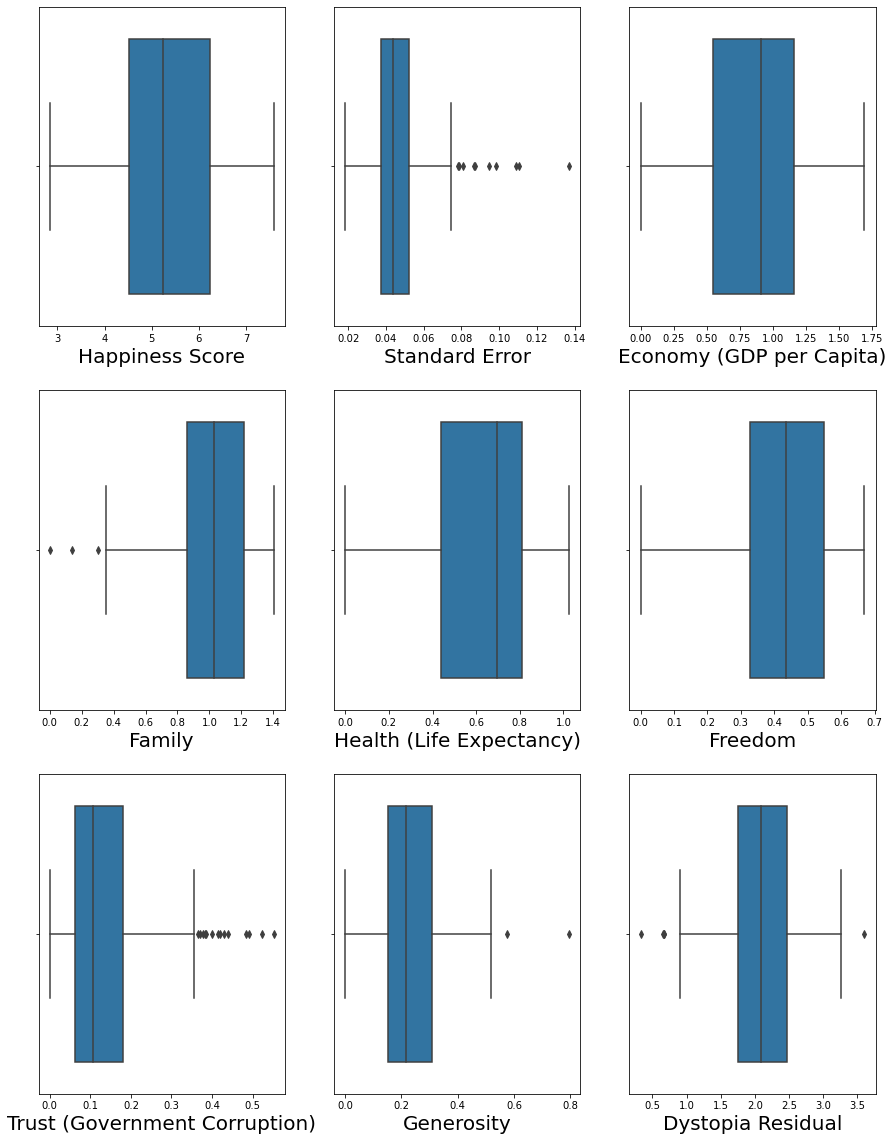

In [33]:
plt.figure(figsize=(15,20))
plotnumber=1

for column in df:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber=plotnumber+1

plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
scaler=StandardScaler()

In [40]:
X=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [41]:
x_scaled=scaler.fit_transform(X)


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=41)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [44]:
lm=LinearRegression()

In [45]:
lm.fit(x_train,y_train)

LinearRegression()

In [46]:
y_pred=lm.predict(x_train)

In [47]:
ypred=lm.predict(x_test)

In [48]:
lm.score(x_train,y_train)

0.9999999430244397

In [49]:
lm.score(x_test,y_test)

0.9999999260124289

# R2 score

In [35]:
from scipy import stats

In [50]:
print('R2 score:',r2_score(ypred,y_test))

R2 score: 0.9999999260215032


In [51]:
print('R2 score:',r2_score(y_pred,y_train))

R2 score: 0.9999999430244365


In [52]:
mean_squared_error(y_test,ypred)

9.590993119226326e-08

In [53]:
print(np.sqrt(mean_squared_error(y_test,ypred)))

0.000309693285675139


In [54]:
mean_absolute_error(y_test,ypred)

0.0002742178542784556

In [55]:
lm.coef_

array([1.21784232e-05, 3.91901693e-01, 2.73990743e-01, 2.48720777e-01,
       1.50599477e-01, 1.12045707e-01, 1.20013016e-01, 5.42672445e-01])

In [56]:
residual=y_test-ypred

In [57]:
residual

135    0.000272
113   -0.000483
131    0.000429
43     0.000269
148   -0.000210
39    -0.000353
66     0.000291
58     0.000485
73     0.000295
146    0.000174
65    -0.000251
23     0.000404
121   -0.000264
109    0.000502
100   -0.000287
56    -0.000294
57    -0.000156
133   -0.000436
51    -0.000084
156    0.000448
41    -0.000230
129    0.000485
20    -0.000116
45    -0.000018
71     0.000389
53    -0.000236
69    -0.000109
2      0.000049
70    -0.000037
155   -0.000073
31    -0.000107
38     0.000270
122   -0.000291
138    0.000204
78     0.000229
137    0.000181
152    0.000495
14    -0.000515
Name: Happiness Score, dtype: float64

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

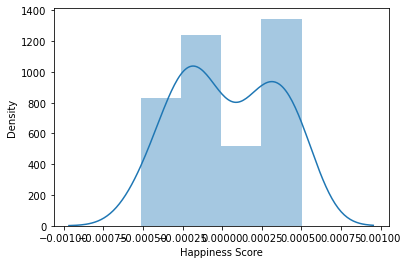

In [58]:
sns.distplot(residual)

Text(0, 0.5, 'predicted val')

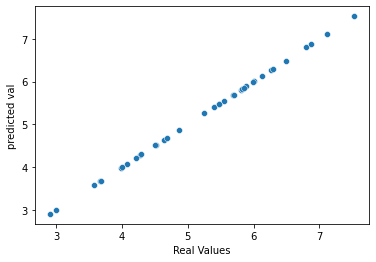

In [59]:
sns.scatterplot(ypred,y_test)
plt.xlabel("Real Values")
plt.ylabel("predicted val")

In [36]:
df=df[np.abs(stats.zscore(df)<3).all(axis=1)]

In [37]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
